Dylan Hastings

# 1. Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [171]:
df = pd.read_csv('data/tennis.csv')

In [172]:
df = df.loc[df.isna().sum(axis=1) == 0]

In [173]:
x = df['player2 total points won']
y = df['player1 total points won']
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          3.173e+04
Date:                      Sat, 16 Jan 2021   Prob (F-statistic):                        0.00
Time:                              14:25:56   Log-Likelihood:                         -4262.4
No. Observations:                      1016   AIC:                                      8527.
Df Residuals:                          1015   BIC:                                      8532.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player2 total points won     1.1257      0.006    178.124      0.000       1.113       1.138
==============================================================================
Omnibus:                       71.489   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.456
Skew:                          -0.707   Prob(JB):                     2.78e-19
Kurtosis:                       3.148   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case, the coefficient can been seen as the average ratio of the total points scored by Federer to the total points scored by his opponent.  On average, Federer dominates his opponents, outscoring them by almost 13%.  The p-value of 0.000 indicates that we can safely reject the null hypothesis that the total points scored by Federer and his opponents are statistically equal.  Therefore, Federer significantly outscores his opponent in the majority of his matches.

In [174]:
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.794
Model:                                  OLS   Adj. R-squared:                  0.794
Method:                       Least Squares   F-statistic:                     3903.
Date:                      Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                              14:25:56   Log-Likelihood:                -4016.0
No. Observations:                      1016   AIC:                             8036.
Df Residuals:                          1014   BIC:                             8046.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       26.3403      1.047     25.160      0.000      24.286      28.395
player2 total points won     0.8200      0.013     62.477      0.000       0.794       0.846
==============================================================================
Omnibus:                       76.898   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.953
Skew:                          -0.634   Prob(JB):                     7.26e-23
Kurtosis:                       3.894   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case, adding a constant term significantly lowered the R-squared value, so it should not be added.  It also does not make sense statistically, since Federer's opponent should not have any points when Federer has not scored any points.  With a constant offset, the coefficient becomes 0.82, implying Federer is generally outscored by his opponent, which is not the case.

# 2. College admissions

Using the `college.csv` dataset, answer the following:

1. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?


In [175]:
df = pd.read_csv('data/college.csv')

In [176]:
df.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


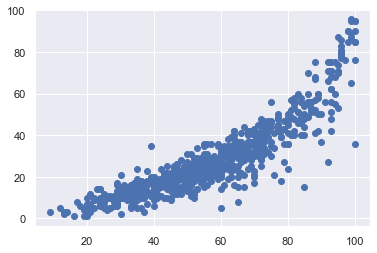

In [177]:
x = df['Top25perc']
y = df['Top10perc']
plt.scatter(x, y)

In [178]:
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Top10perc   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              7971.
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                        0.00
Time:                        14:25:58   Log-Likelihood:                         -2871.5
No. Observations:                 777   AIC:                                      5745.
Df Residuals:                     776   BIC:                                      5750.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Top25perc      0.5275      0.006     89.281      0.000       0.516       0.539
==============================================================================
Omnibus:                      308.637   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1351.429
Skew:                           1.814   Prob(JB):                    3.47e-294
Kurtosis:                       8.346   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
df['Top25perc2'] = df.Top25perc ** 2
X = df[['Top25perc','Top25perc2']]
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Top10perc   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              8377.
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                        0.00
Time:                        14:25:58   Log-Likelihood:                         -2600.9
No. Observations:                 777   AIC:                                      5206.
Df Residuals:                     775   BIC:                                      5215.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Top25perc      0.0974      0.016      6.106      0.000       0.066       0.129
Top25perc2     0.0062      0.000     27.930      0.000       0.006       0.007
==============================================================================
Omnibus:                      149.322   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              749.525
Skew:                          -0.773   Prob(JB):                    1.75e-163
Kurtosis:                       7.557   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top10perc   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     2305.
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:25:58   Log-Likelihood:                -2578.5
No. Observations:                 777   AIC:                             5163.
Df Residuals:                     774   BIC:                             5177.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7490      1.735      6.773      0.000       8.344      15.154
Top25perc     -0.3124      0.062     -5.002      0.000      -0.435      -0.190
Top25perc2     0.0095      0.001     18.066      0.000       0.008       0.011
==============================================================================
Omnibus:                      184.094   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              954.340
Skew:                          -0.970   Prob(JB):                    5.86e-208
Kurtosis:                       8.071   Cond. No.                     3.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this case, a constant term is not useful because it reduces the R-squared.  The best model specifications maximize the R-squared value, so in this case, the best model is one variable and a polynomial of degree 2 with no constant term.

2. Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for `Private`. Explain your model specification choices.

In [181]:
df['Private'] = df.Private.replace(('Yes', 'No'), (1, 0))

In [182]:
y = df['Accept']
x = df['Private']
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Accept   R-squared (uncentered):                   0.123
Model:                            OLS   Adj. R-squared (uncentered):              0.122
Method:                 Least Squares   F-statistic:                              108.9
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                    6.09e-24
Time:                        14:25:59   Log-Likelihood:                         -7316.3
No. Observations:                 777   AIC:                                  1.463e+04
Df Residuals:                     776   BIC:                                  1.464e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Private     1305.7027    125.137     10.434      0.000    1060.056    1551.350
==============================================================================
Omnibus:                      523.900   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7137.076
Skew:                           2.899   Prob(JB):                         0.00
Kurtosis:                      16.669   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since there is a positive coefficient of 1305, it seems private schools see more applications overall.  Here a binary explanatory variable was used for the Private predictor term.

# 3. Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 

In [183]:
import io

with open('data/auto.csv', 'r') as f:
    lines = f.readlines()

data = [lines[0]] + lines[2:]
data = io.StringIO('\n'.join([s for s in data]))
df = pd.read_csv(data, delim_whitespace=True)
df.horsepower = df.horsepower.replace("?", np.nan).astype(float)
df = df.loc[df.isna().sum(axis=1) == 0]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


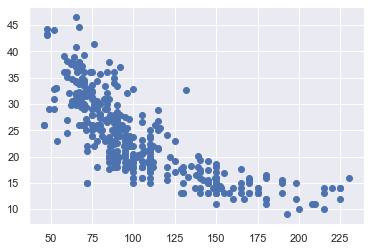

In [184]:
y = df.mpg
x = df.horsepower
plt.scatter(x, y)

In [185]:
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                              723.7
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                    5.67e-91
Time:                        14:26:01   Log-Likelihood:                         -1608.1
No. Observations:                 392   AIC:                                      3218.
Df Residuals:                     391   BIC:                                      3222.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower     0.1788      0.007     26.901      0.000       0.166       0.192
==============================================================================
Omnibus:                       13.847   Durbin-Watson:                   0.471
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.780
Skew:                          -0.268   Prob(JB):                      0.00752
Kurtosis:                       2.442   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since there is a non-zero coefficient, there is a relationship between the predictor and the response.

 ii. How strong is the relationship between the predictor and the response?
 


Since the R-squared value is 0.649, the relation between predictor and response is somewhat strong.

 iii. Is the relationship between the predictor and the response positive or negative?



In [186]:
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           7.03e-81
Time:                        14:26:01   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the sign of the coefficient is negative, the relationship between the predictor and the response is negative.

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

In [187]:
horsepower = 98
mpg = 39.9359 - 0.1578 * horsepower
mpg

24.4715

The 95% and prediction intervals are taken from the OLS table to be -0.171 and -0.145.

 v. Make a regression plot the response and the predictor.

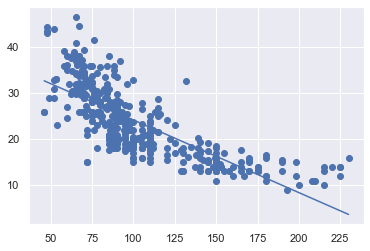

In [188]:
x = df.horsepower
xmin, xmax = x.min(), x.max()
xfit = np.linspace(xmin, xmax, 100)
yfit = est.predict(sm.add_constant(xfit))
plt.scatter(x, y)
plt.plot(xfit, yfit)

# 4. Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?



In [189]:
X = df.copy()
X = X.drop(columns=['name','mpg'])
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                        0.00
Time:                        14:26:04   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.7055      0.323     -2.181      0.030      -1.341      -0.070
displacement     0.0219      0.008      2.871      0.004       0.007       0.037
horsepower      -0.0396      0.013     -3.147      0.002      -0.064      -0.015
weight          -0.0060      0.001     -9.258      0.000      -0.007      -0.005
acceleration    -0.0796      0.090     -0.881      0.379      -0.257       0.098
year             0.5836      0.024     24.150      0.000       0.536       0.631
origin           1.3100      0.281      4.663      0.000       0.758       1.862
==============================================================================
Omnibus:                       46.837   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.015
Skew:                           0.681   Prob(JB):                     2.84e-20
Kurtosis:                       4.912   Cond. No.                     6.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the coefficients for each predictor are non-zero, there is a relationship between the predictors and the response.

ii. Which predictors appear to have a statistically significant relationship to the response?



Looking at the coefficients, origin, year and cylinders seem to have a statistically significant relationship on the response.

iii. What does the coefficient for the year variable suggest?



The coefficient of 0.5836 for the year suggests that the year of the case has a statistically significant relationship with the response.  The positive sign implies that as time increases, the miles per gallon also tends to increase.

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?


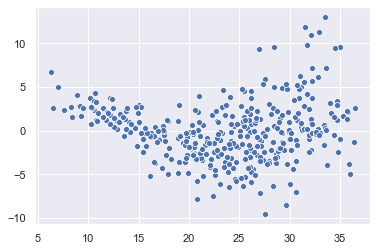

In [196]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
res = est.resid
sns.scatterplot(est.predict(X), res)

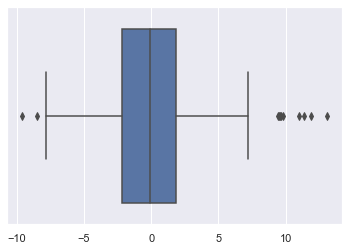

In [197]:
sns.boxplot(res)

This boxplot shows there do appear to be outliers outside of the error bars.

v. Is there heteroscedasticity in the fit?

As the fitted values increases, the variance of the residuals also increases, indicating that heteroscedasticity is most likely present in the fit.

# 5. Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.



In [155]:
df = pd.read_csv('data/carseats.csv')
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [157]:
df['Urban'] = df.Urban.replace(('Yes', 'No'), (1, 0))
df['US'] = df.US.replace(('Yes', 'No'), (1, 0))
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1


In [159]:
y = df['Sales']
X = df[['Price','Urban','US']]
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              564.2
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                   9.52e-143
Time:                        12:53:54   Log-Likelihood:                         -1067.7
No. Observations:                 400   AIC:                                      2141.
Df Residuals:                     397   BIC:                                      2153.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price          0.0406      0.003     12.841      0.000       0.034       0.047
Urban          1.2917      0.374      3.457      0.001       0.557       2.026
US             2.1948      0.360      6.091      0.000       1.486       2.903
==============================================================================
Omnibus:                        1.426   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                1.214
Skew:                           0.121   Prob(JB):                        0.545
Kurtosis:                       3.120   Cond. No.                         260.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!



The price has a coefficient of 0.04, so there does not appear to be strong evidence of association with the sales.  Whether or not the car seat is in a urban location has a coefficient of 1.29, so there does appear to be an association with sales.  Similarly, whether or not the car seat is in the US has a coefficient of 2.19, so this also appears to have an association with sales.

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?



All predictors have P-values of 0.001 or less, so we can reject the null hypothesis for all predictors.

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.



In [162]:
X = df[['Urban','US']]
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.730
Method:                 Least Squares   F-statistic:                              541.1
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                   3.04e-114
Time:                        13:01:03   Log-Likelihood:                         -1137.1
No. Observations:                 400   AIC:                                      2278.
Df Residuals:                     398   BIC:                                      2286.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Urban          4.3459      0.342     12.694      0.000       3.673       5.019
US             4.7338      0.358     13.226      0.000       4.030       5.437
==============================================================================
Omnibus:                        2.020   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.856
Skew:                           0.077   Prob(JB):                        0.395
Kurtosis:                       2.704   Cond. No.                         2.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.



The model in 1 has a R-squared value of 0.81, which seems to fit the data better than the model in 4, which has a R-squared value of 0.73.  It also has lower values for AIC and BIC.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

Looking at the OLS table, the 95% confidence intervals are 3.673 and 5.019 for Urban and 4.030 and 5.437 for US.